# Introduction : US Prisoner Data

These data summarise the admissions and releases in the US prison system split by ethnicity of prisoner over a 7 year period, 2015 to 2022. This will help to demonstrate the change in rates over the covid-19 pandemic. There is evidence that the Covid-19 pandemic emphasised the disproportionate representation of black and hispanic individuals in US prisons, with a sharp increase in the release of white prisoners (Klein et al., 2023). These data could be used to investigate this trend. In order to observe trends, we will look at the data for both admissions and releases.

Found Here:

https://www.kaggle.com/datasets/konradb/prison-population-in-the-us


In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

# Importing the data as a dataframe
data = pd.read_csv('admissions_releases_states.csv', encoding='unicode_escape')

# Desribing the data (rows, columns) 
data.shape

(1914, 16)

As we can see, the data set above is very long, we will attempt to wrangle this data below. 


The data are a collection mostly of integers and floats, meaning it is mostly numerical continuous data.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1914 entries, 0 to 1913
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 1914 non-null   object 
 1   admissions_total     1914 non-null   int64  
 2   admissions_white     1914 non-null   int64  
 3   admissions_black     1914 non-null   int64  
 4   admissions_hispanic  1914 non-null   float64
 5   admissions_amerind   1914 non-null   float64
 6   admissions_asian     1914 non-null   float64
 7   admissions_other     1914 non-null   float64
 8   releases_total       1914 non-null   int64  
 9   releases_white       1914 non-null   int64  
 10  releases_black       1914 non-null   int64  
 11  releases_hispanic    1914 non-null   float64
 12  releases_amerind     1914 non-null   float64
 13  releases_asian       1914 non-null   float64
 14  releases_other       1914 non-null   float64
 15  state                1914 non-null   o

# State Data

One of the aspects of the data that is both an advantage and a disadvantage, is the bredth of it. It records admissions from, in some cases, the early 2000's from 18 states in the US. This is an advantage as it gives us an in depth view of the trends we might observe, however, it means that our raw data is long and difficult to interpret without some grouping. First we will allow ourselves to group our data by State, for example, Arizona.

In [3]:
#grouping the data by state
grouped = data.groupby('state')
print(grouped.get_group('Arizona'))

          date  admissions_total  admissions_white  admissions_black  \
0   2015-02-01              1583               600               193   
1   2015-03-01              1580               615               189   
2   2015-04-01              1779               706               235   
3   2015-05-01              1821               730               260   
4   2015-06-01              1689               704               215   
..         ...               ...               ...               ...   
87  2022-05-01              1172               427               153   
88  2022-06-01              1145               424               171   
89  2022-07-01              1027               369               135   
90  2022-08-01              1076               377               172   
91  2022-09-01              1275               459               191   

    admissions_hispanic  admissions_amerind  admissions_asian  \
0                 633.0               130.0               6.0   
1    

In [4]:
# checking the groups have formed properly - should be 18 as there are 18 states in the set
grouped.ngroups

18

This allows us to narrow down data by State, in case we want to investigate one state against another. Given that states are governed serparately, and separate social entities, these data are likely to vary between states. We can investigate these differences now they are grouped. 

For example, out of our data, West Virginia has the largest proportion of black people (20%), and the state of Montana has the lowest (1%) (World Population review, 2024). We can plot the proportion of admissions that were black people by state, to see if these proportions are reflected in our data set. 

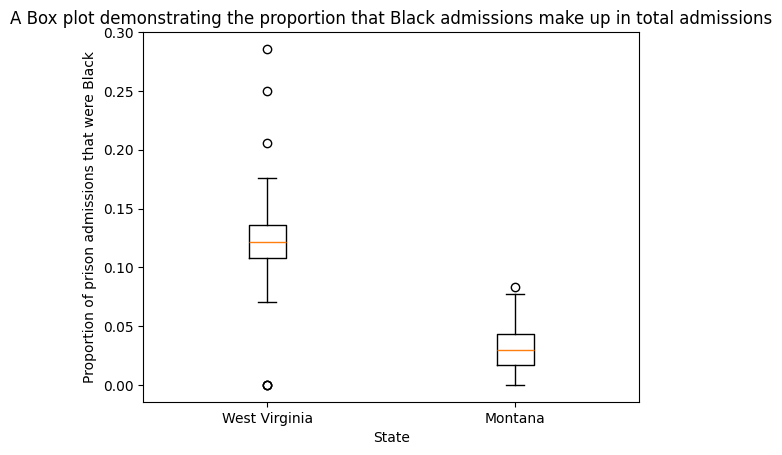

In [5]:
import matplotlib.pyplot as plt

#Creating a new dataframe grouped by state including total admissions and black admissions
proportional = data.groupby('state')[['admissions_total', 'admissions_black']]

# creating data frames for West Virginia and Montana
wv_blackprop = proportional.get_group('West Virginia')
mon_blackprop = proportional.get_group('Montana')

# Creating a new collumn in each data frame with the proportion of black admissions
wv_blackprop['black_proportion'] = wv_blackprop['admissions_black']/ wv_blackprop['admissions_total']
mon_blackprop['black_proportion'] = mon_blackprop['admissions_black']/ mon_blackprop['admissions_total']

# Plotting the graph
plt.boxplot(wv_blackprop['black_proportion'], positions=[1]) 
plt.boxplot(mon_blackprop['black_proportion'], positions=[2])
plt.title('A Box plot demonstrating the proportion that Black admissions make up in total admissions')
plt.xlabel('State')
plt.ylabel('Proportion of prison admissions that were Black')
plt.xticks([1,2], ['West Virginia', 'Montana'])
plt.show() 


We can also plot these trends for the releases from our data. 

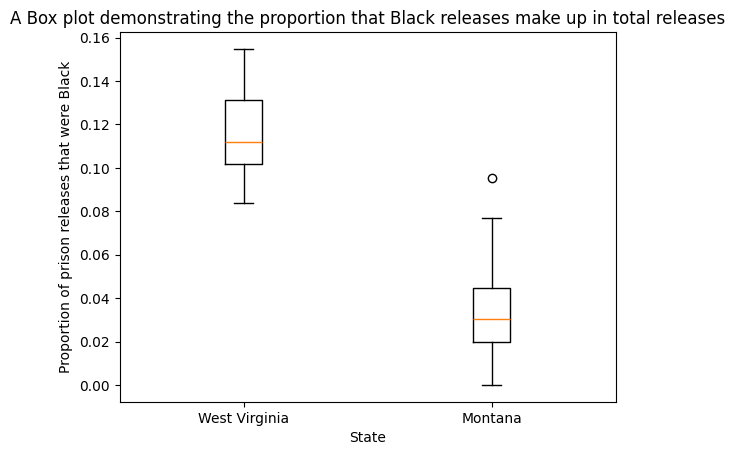

In [6]:
#Creating a new dataframe grouped by state including total releases and black releases
proportional_releases = data.groupby('state')[['releases_total', 'releases_black']]

# creating data frames for West Virginia and Montana
wv_blackproprel = proportional_releases.get_group('West Virginia')
mon_blackproprel = proportional_releases.get_group('Montana')

# Creating a new collumn in each data frame with the proportion of black releases
wv_blackproprel['black_proportion'] = wv_blackproprel['releases_black']/ wv_blackproprel['releases_total']
mon_blackproprel['black_proportion'] = mon_blackproprel['releases_black']/ mon_blackproprel['releases_total']

# Plotting the graph
plt.boxplot(wv_blackproprel['black_proportion'], positions=[1]) 
plt.boxplot(mon_blackproprel['black_proportion'], positions=[2])
plt.title('A Box plot demonstrating the proportion that Black releases make up in total releases')
plt.xlabel('State')
plt.ylabel('Proportion of prison releases that were Black')
plt.xticks([1,2], ['West Virginia', 'Montana'])
plt.show() 


The data demonstrate a clear difference between the proportions of admissions in West Virginia and Montana. The proportion that Black people make up in admissions and releases is smaller in Montana, reflecting the smaller proportion of the population that Black people represent. The ranges of admissions, however, cross over, where the ranges of releases do not. 

The proportion in releases and admissions in Montana is largely the same, however, the proportion of West Virginia admissions has some data that is much higher than releases. 

This comparison allows us to observe trends from specifc States in the case that we want to examine these differences further and to investigate if there is any significant trends in these data between states.

# Trends over time

While observing between states can give us great insight, it is also important that we are able to discuss these data in the context of the whole country. This will allow us to see any trends in admissions or releases over time. In order to investigate the trends of these data, we must visualise these in graphical format.

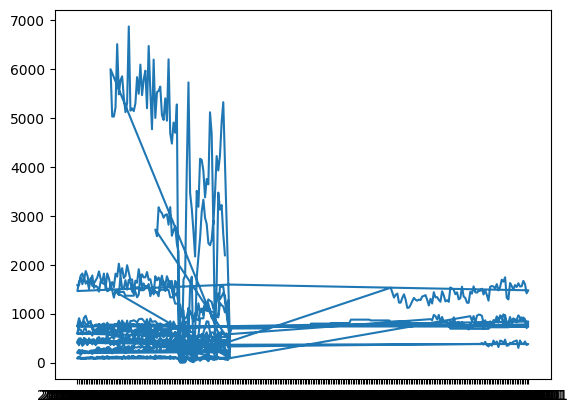

In [7]:
import matplotlib.pyplot as plt

# Plotting all of the admissions on a graph
plt.plot(data['date'], data['admissions_total'])  
plt.show()

We can see that initially, these data do not show us any clear conclusions due to the data set jumping around in dates and location, no trends are observable here. We can adjust these data to visualise them more clearly. 

We can visualise the trend in admissions by calculating an average for each year and plotting this. 

In [8]:
# This turns all of the dates into datetime format and isolates only the year from the date 
data['date'] = pd.to_datetime(data['date']).dt.year

# This groups the data by year and calculates the average of the admissions by year
admissions_av = data.groupby(["date"]).agg({"admissions_total": "mean"})

print(admissions_av)

      admissions_total
date                  
2000        696.000000
2001        698.000000
2002        737.000000
2003        728.000000
2004        796.000000
2005        808.000000
2006        877.000000
2007        861.000000
2008       1075.958333
2009       1037.500000
2010        981.777778
2011        955.888889
2012        884.388889
2013        874.150000
2014        883.000000
2015        622.161290
2016        682.601093
2017        964.539216
2018        976.279412
2019       1034.550926
2020        570.250000
2021        750.273148
2022        781.038462


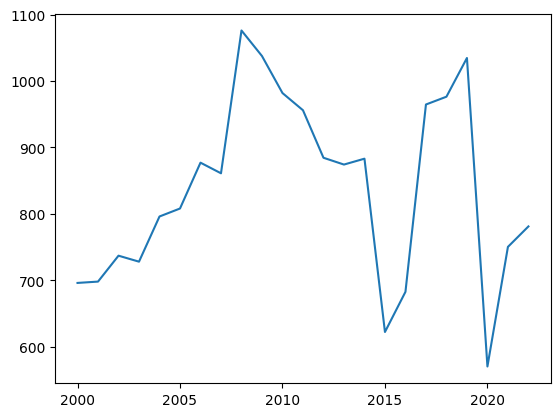

In [9]:
# Plots these averages
plt.plot(admissions_av["admissions_total"])
plt.show() 

We can also plot these averages by ethnicity in order to observe these trends individually. 

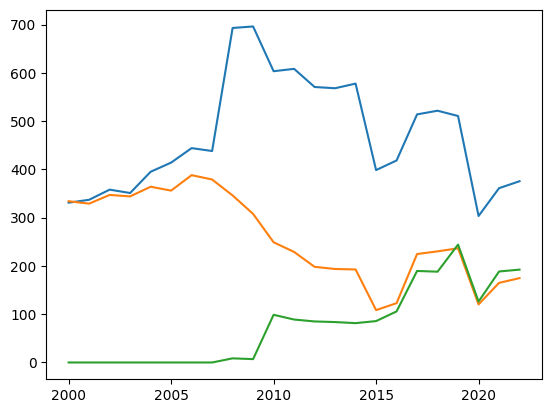

In [10]:
# calculating the average in ethnicity admissions by year
white_av = data.groupby(["date"]).agg({"admissions_white": "mean"})
black_av = data.groupby(["date"]).agg({"admissions_black": "mean"})
hispanic_av = data.groupby(["date"]).agg({"admissions_hispanic": "mean"})

# Plotting the graph
plt.plot(white_av["admissions_white"])  
plt.plot(black_av["admissions_black"])
plt.plot(hispanic_av["admissions_hispanic"])
plt.show() 

As we can see, generally the peaks and troughs in ethnicity admissions follow those in the admissions total. For example, in 2020 total admissions per month drops to less than 600, an unprecidented low, reflected in each of the ethnicities in the second graph. Interestingly, there is a peak in White admissions in 2008, reflected in the total admissions on the first graph. This peak is not observed in Black or Hispanic admissions, but this may be due to the restrictions on the Hispanic data recorded. 

Hispanic data only appears after 2008, meaning admissions before this are missing this additional context. It is unclear if these were previously recorded as an alternative ethnicity or just not recorded at all.

We can also observe these trends in releases.


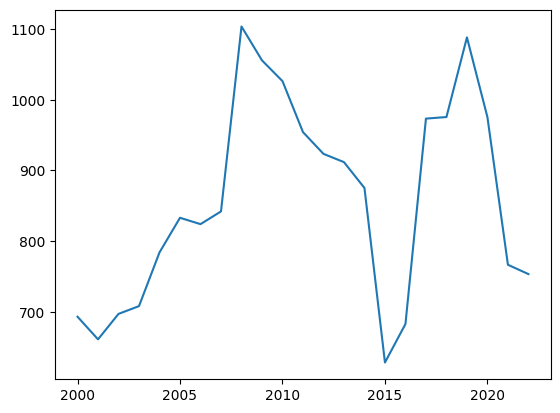

In [11]:
# This groups the data by year and calculates the average of the releases by year
releases_av = data.groupby(["date"]).agg({"releases_total": "mean"})

# Plots these averages
plt.plot(releases_av["releases_total"])  
plt.show()

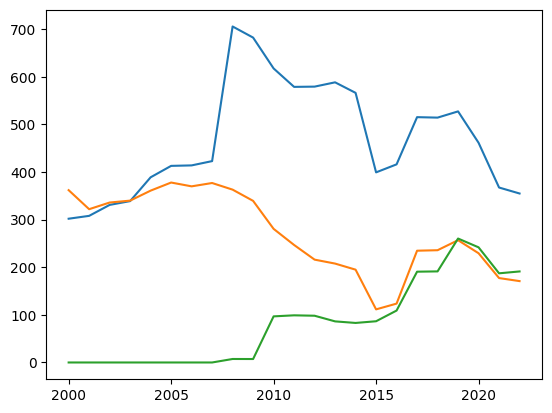

In [12]:
# calculating the average in ethnicity releases by year
rel_white_av = data.groupby(["date"]).agg({"releases_white": "mean"})
rel_black_av = data.groupby(["date"]).agg({"releases_black": "mean"})
rel_hispanic_av = data.groupby(["date"]).agg({"releases_hispanic": "mean"})

# Plotting the graph
plt.plot(rel_white_av["releases_white"])  # Plot the chart
plt.plot(rel_black_av["releases_black"])
plt.plot(rel_hispanic_av["releases_hispanic"])
plt.show()  # display

These graphs also demonstrate peaks and troughs that are largely reflected in the data when split by ethnicity. For example, 2015 has the lowest average releases per month, at just above 600 per month. This is reflected in a dip in all three ethnicities isolated on the second graph. Interestingly, the trends above tend to show a decrease from 2020, suggesting that releases are decreasing since Covid, however, this may not be an accurate assumption as there is a large peak of releases in 2020, having increased from 2015. More data is needed over a longer time period to make stronger conclusions about this data.

This does not show us the difference that might be seen proportionately, it is hard to observe how much of the releases or admissions each ethnicity takes up out of the total.

We can visualise the proportion that each of these ethnicities take up in admissions per year using a stacked bar graph.


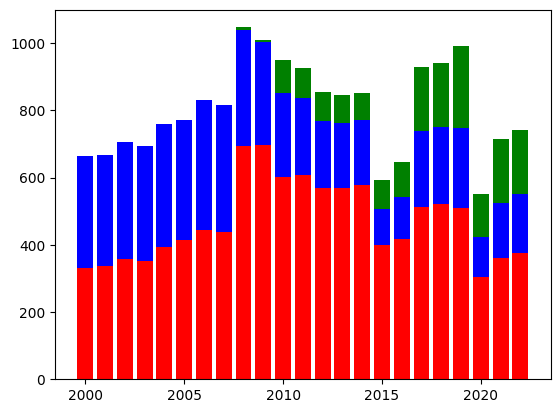

In [13]:
# assigning these averages to a variable
white_chart = white_av["admissions_white"]
black_chart = black_av["admissions_black"]
hispanic_chart = hispanic_av["admissions_hispanic"]

#tracking the year of the average based on the index's of the original list white_av
year = white_av.index.to_list()

# plotting the graph
plt.bar(year, white_chart, color='red')
plt.bar(year, black_chart, bottom=white_chart, color='blue')
plt.bar(year, hispanic_chart, bottom=black_chart+white_chart, color='green')
plt.show()

We can see the introduction of Hispanic data from 2008 clearly in this graph. 

In 2000, Black admissions take up nearly 50% of the monthly average of admissions, however, by 2022 this has reduced to only around 25%. This is not adjusted for by White admissions, but by Hispanic admissions representing another 20% or so. However, between 2008 and 2014, White admissions represented a much larger proportion of total admissions than Black or Hispanic admissions. 

We can look at the same trends for releases.



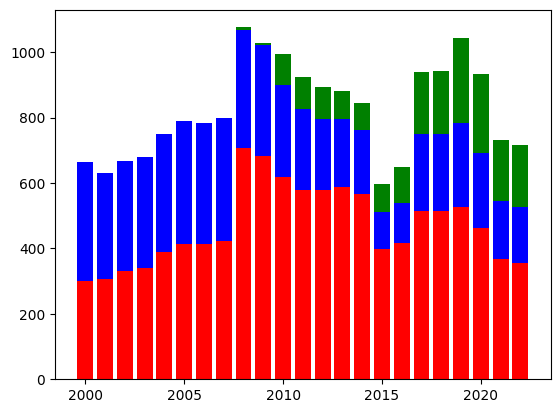

In [14]:
# assigning these averages to a variable
white_chart_rel = rel_white_av["releases_white"]
black_chart_rel = rel_black_av["releases_black"]
hispanic_chart_rel = rel_hispanic_av["releases_hispanic"]

#tracking the year of the average based on the index's of the original list rel_white_av
year = rel_white_av.index.to_list()

# plotting the graph
plt.bar(year, white_chart_rel, color='red')
plt.bar(year, black_chart_rel, bottom=white_chart_rel, color='blue')
plt.bar(year, hispanic_chart_rel, bottom=black_chart_rel+white_chart_rel, color='green')
plt.show()

In 2000, White releases represented about 50% of total releases, with Black releases making up the other 50%, by  2022 Black releases represented about 20% of releases, with Hispanic releases representing around the same. There is a similar pattern between 2008 and 2014 here where the proportion of releases represented by White people increases, however, so does the total releases. White releases remain largely consistent after 2017, with a small dip post 2020, however, the total releases decreases significantly, meaning that this large dip is represented by the minority ethnicities here. While these bar charts help us to visualise the change over time, we are specifically interested in proportion post covid. 


In order to investigate the effects of the covid-19 pandemic we can ignore any data before 2019.


In [15]:
# Getting rid of data pre 2019
post_covid_data = data[(data['date']) >= 2019]

post_covid_data

,date,admissions_total,admissions_white,admissions_black,admissions_hispanic,admissions_amerind,admissions_asian,admissions_other,releases_total,releases_white,releases_black,releases_hispanic,releases_amerind,releases_asian,releases_other,state
47,2019,1460,588,179,549.0,118.0,6.0,20.0,1500,578,185,581.0,123.0,6.0,27.0,Arizona
48,2019,1426,568,174,528.0,134.0,6.0,16.0,1580,649,211,573.0,117.0,8.0,22.0,Arizona
49,2019,1355,512,212,484.0,113.0,10.0,24.0,1334,504,181,525.0,94.0,5.0,25.0,Arizona
50,2019,1666,662,193,649.0,131.0,2.0,29.0,1376,529,153,550.0,109.0,10.0,25.0,Arizona
51,2019,1578,640,190,579.0,132.0,5.0,32.0,1400,537,180,534.0,120.0,6.0,23.0,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,2022,3475,812,746,1753.0,0.0,0.0,164.0,3018,669,785,1395.0,0.0,0.0,169.0,California
1910,2022,3126,770,701,1490.0,0.0,0.0,165.0,2585,571,631,1239.0,0.0,0.0,144.0,California
1911,2022,3221,851,699,1479.0,0.0,0.0,192.0,2673,647,633,1252.0,0.0,0.0,141.0,California
1912,2022,2624,611,576,1290.0,0.0,0.0,147.0,2590,646,560,1231.0,0.0,0.0,153.0,California


In [16]:
# adding up all of the admissions per year to get total admissions
post_covid_admissions = post_covid_data.groupby(["date"]).agg({"admissions_white": "sum", "admissions_black": "sum", "admissions_hispanic": "sum"})


post_covid_admissions


,admissions_white,admissions_black,admissions_hispanic
date,,,
2019,110273,51090,52734.0
2020,65537,25988,27255.0
2021,77986,35621,40705.0
2022,48807,22711,25004.0


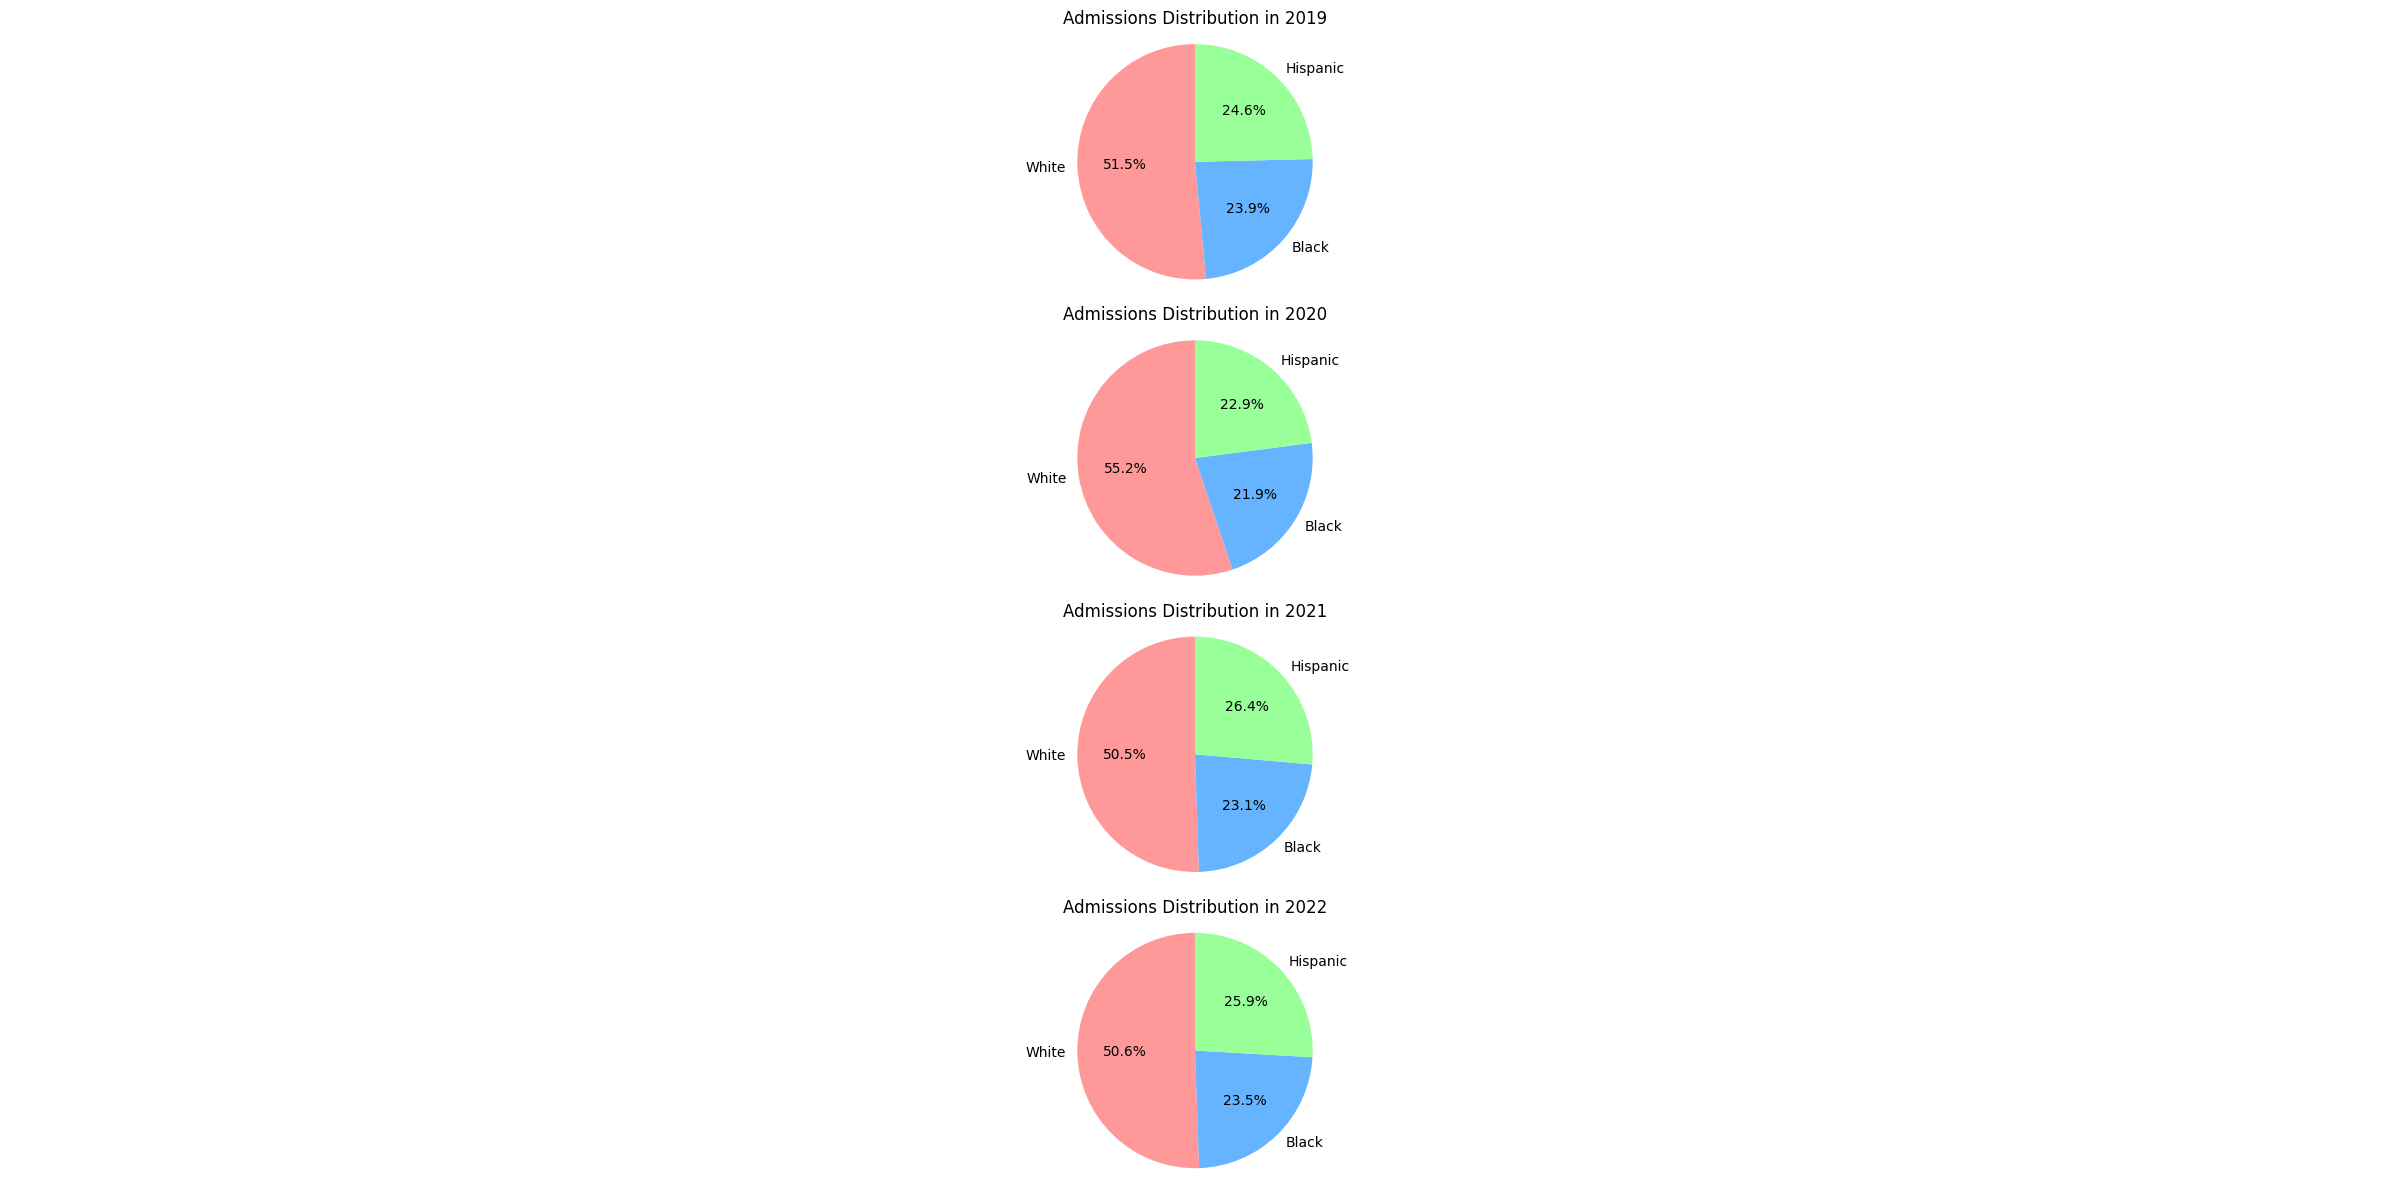

In [17]:
# Set up the plot size and layout
fig, axes = plt.subplots(4, 1, figsize=(24, 12))

# for loop to make a pie chart for each year post 2019 
for index, (year, row) in enumerate(post_covid_admissions.iterrows()):
    white = row['admissions_white']
    black = row['admissions_black']
    hispanic = row['admissions_hispanic']

    total_population = white + black + hispanic
    
    axes[index].pie([white, black, hispanic], 
                labels=['White', 'Black', 'Hispanic'],
                autopct='%1.1f%%',
                startangle=90,
                colors=['#ff9999','#66b3ff','#99ff99'])
    
    axes[index].set_title(f'Admissions Distribution in {year}')
    axes[index].axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.tight_layout()
plt.show()

We can see here that White admissions remain mostly consistent at 50%, apart from in 2020 where White admissions represented 55% of total admissions. Since 2020, Black admissions have represented 23% of total admissions, and Hispanic admissions represented around 26% of admissions. Given that we know that the state that has the highest Black population has a population of 20% Black people, we know that this is an overrepresentation, at least for the Black populaiton. 

We can observe the same proportions in the releases.

In [18]:
# doing the same for releases data
post_covid_releases = post_covid_data.groupby(["date"]).agg({"releases_white": "sum", "releases_black": "sum", "releases_hispanic": "sum"})

post_covid_releases


,releases_white,releases_black,releases_hispanic
date,,,
2019,113931,55490,56237.0
2020,99696,49562,52249.0
2021,79386,38302,40457.0
2022,46147,22221,24859.0


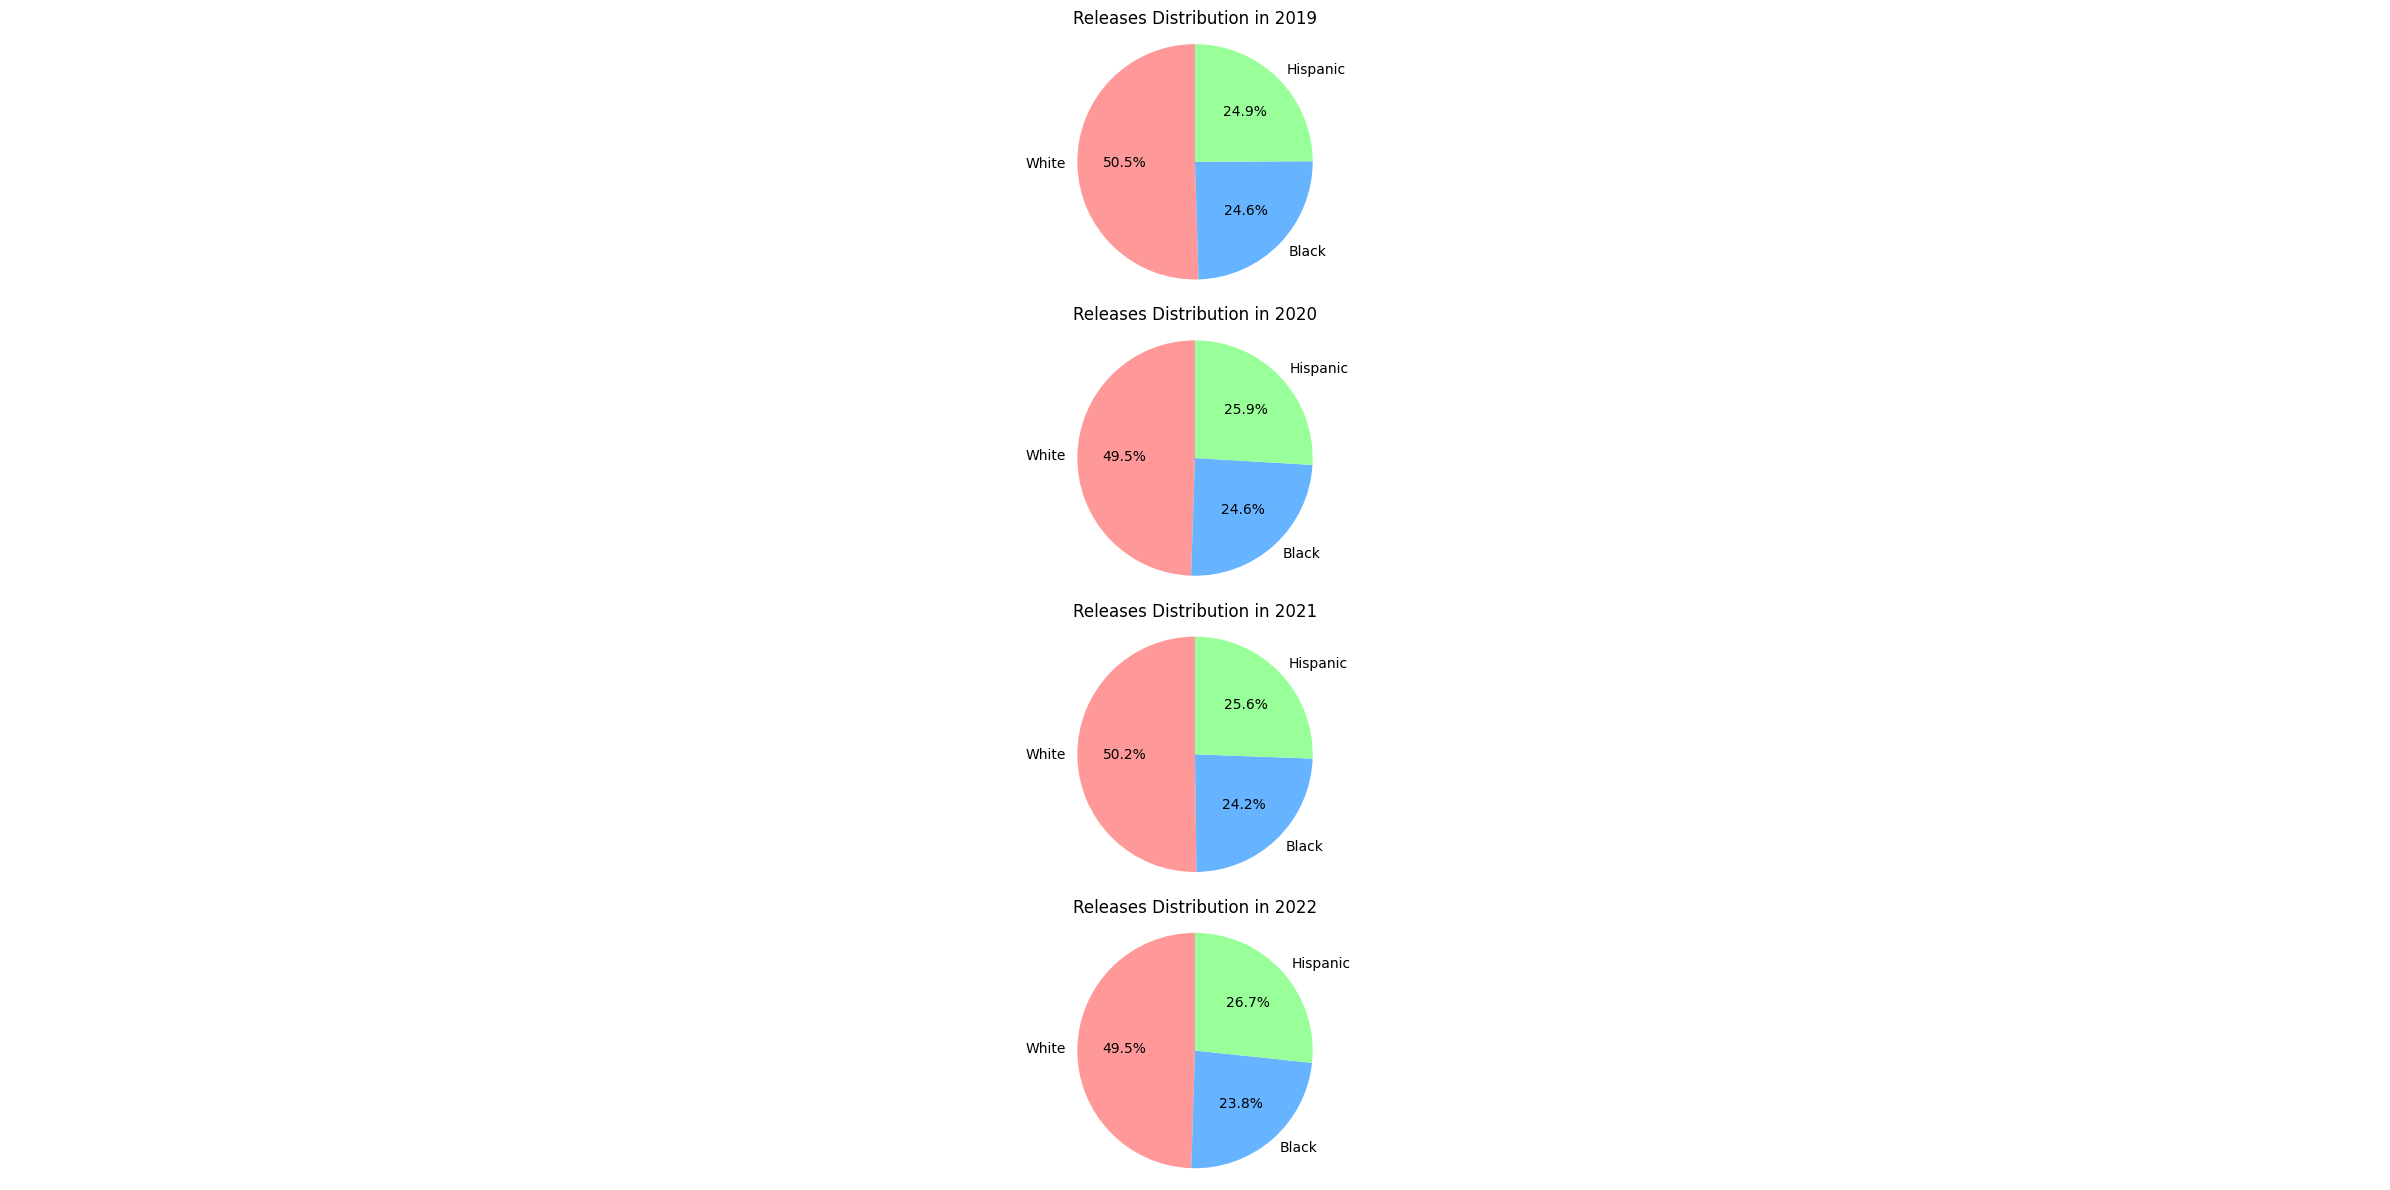

In [19]:
# Set up the plot size and layout
fig, axes = plt.subplots(4, 1, figsize=(24, 12))

# for loop to make a pie chart for each year post 2019 
for index, (year, row) in enumerate(post_covid_releases.iterrows()):
    white = row['releases_white']
    black = row['releases_black']
    hispanic = row['releases_hispanic']

    total_population = white + black + hispanic
    
    axes[index].pie([white, black, hispanic], 
                labels=['White', 'Black', 'Hispanic'],
                autopct='%1.1f%%',
                startangle=90,
                colors=['#ff9999','#66b3ff','#99ff99'])
    
    axes[index].set_title(f'Releases Distribution in {year}')
    axes[index].axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.tight_layout()
plt.show()

Releases data follows largely the same proportion of admissions. White people here represent a slighly smaller proportion, remaining between 49% and 50% from 2019 onwards. The Hispanic releases have increased slowly from 25% to 27% over time, despite the same increase not being seen in the admissions data. Black releases are, however, decreasing slowly, from 25% to 23% from 2019. This demonstrates that Black populations in prisons may be incresing in disproportionality. 

# Conclusions


These data demonstrate an overrepresentation of Black and Hispanic ethnicities in prisoner data in the US. The nature and directional trend of this overepresentation varies over the years of the data, but is consistently above representational. This may be due to contribution social factors that make minority ethnicities more likely to commit a crime in the first place, as well as restrict access to sufficient legal council. 

Generally, the trend observed in Klein et al. (2023) that there is a sharp increase in white releases post covid has not been observed in the above data. In fact, it appears as though white releases are decreasing post 2019, but more research and testing is necessary here to strengthen these conclusions.

While this assignment does not include statistical inference testing, next steps with data would include a student's t test to help determine if there is a significant difference between the mean admissions per month between years to examine the directionality of the trend. 

Due to the observed difference between states, it may also be useful to consider a chi squared test to examine if there is a significant difference between observed and expected data in those states where proportion of Black or Hispanic population may be observably different to the proportion of those in prisons. 

# References

Klein, B. et al. (2023) ‘COVID-19 amplified racial disparities in the US criminal legal system’, Nature, 617(7960), pp. 344–350. Available at: https://doi.org/10.1038/s41586-023-05980-2.

World Population Review (2024) Black Population by State 2024. Available at: https://worldpopulationreview.com/state-rankings/black-population-by-state (Accessed: 20 December 2024).
